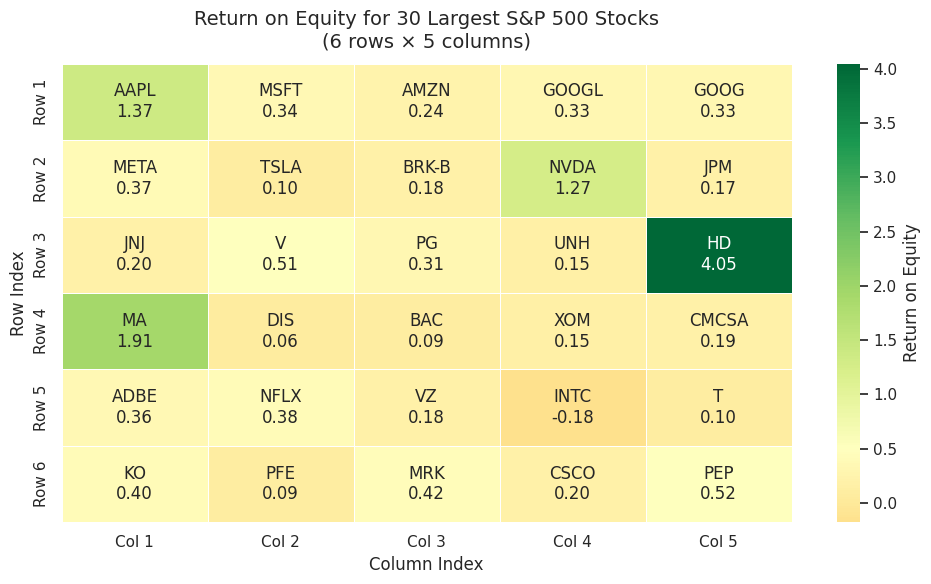

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# 1) Define the 30 largest S&P 500 stocks (example list; actual may vary).
largest_30 = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'BRK-B',
    'NVDA', 'JPM', 'JNJ', 'V', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'BAC',
    'XOM', 'CMCSA', 'ADBE', 'NFLX', 'VZ', 'INTC', 'T', 'KO', 'PFE',
    'MRK', 'CSCO', 'PEP'
]

# 2) Fetch Return on Equity (ROE) values via yfinance.
roe_ratios = {}
for ticker in largest_30:
    try:
        info = yf.Ticker(ticker).info
        # The key for return on equity.
        roe_ratios[ticker] = info.get('returnOnEquity', None)
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
        roe_ratios[ticker] = None

# 3) Prepare a 6 (rows) x 5 (columns) matrix for ROE values (5 values per row).
chunk_size = 5  # 5 ROE values per row
n_rows = len(largest_30) // chunk_size  # = 6 rows

roe_matrix = np.full((n_rows, chunk_size), np.nan)
annot_matrix = np.empty((n_rows, chunk_size), dtype=object)

for i, ticker in enumerate(largest_30):
    row = i // chunk_size
    col = i % chunk_size
    roe_val = roe_ratios[ticker]

    # Fill numeric matrix
    roe_matrix[row, col] = roe_val if roe_val is not None else np.nan

    # Fill annotation matrix with ticker and ROE (or "N/A")
    if roe_val is not None:
        annot_matrix[row, col] = f"{ticker}\n{roe_val:.2f}"
    else:
        annot_matrix[row, col] = f"{ticker}\nN/A"

# Convert numeric matrix to a DataFrame for plotting
df_roe = pd.DataFrame(
    roe_matrix,
    index=[f"Row {r+1}" for r in range(n_rows)],
    columns=[f"Col {c+1}" for c in range(chunk_size)]
)

# 4) Define min, max, and center for the diverging color scale
min_val = np.nanmin(roe_matrix)
max_val = np.nanmax(roe_matrix)
mean_val = np.nanmean(roe_matrix)

# 5) Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_roe,
    cmap='RdYlGn',  # Higher ROE values will be greener, lower values redder
    annot=annot_matrix,
    fmt='',
    linewidths=0.5,
    center=mean_val,
    vmin=min_val,
    vmax=max_val,
    cbar_kws={'label': 'Return on Equity'}
)

plt.title("Return on Equity for 30 Largest S&P 500 Stocks\n(6 rows × 5 columns)", fontsize=14, pad=12)
plt.xlabel("Column Index", fontsize=12)
plt.ylabel("Row Index", fontsize=12)
plt.tight_layout()
plt.show()
